Datos cargados exitosamente para el EDA.


C:\Users\gmola\AppData\Local\Temp\ipykernel_55576\1512263360.py:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\gmola\AppData\Local\Temp\ipykernel_55576\1512263360.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Normal (0)', 'Hipofunción (1)'])


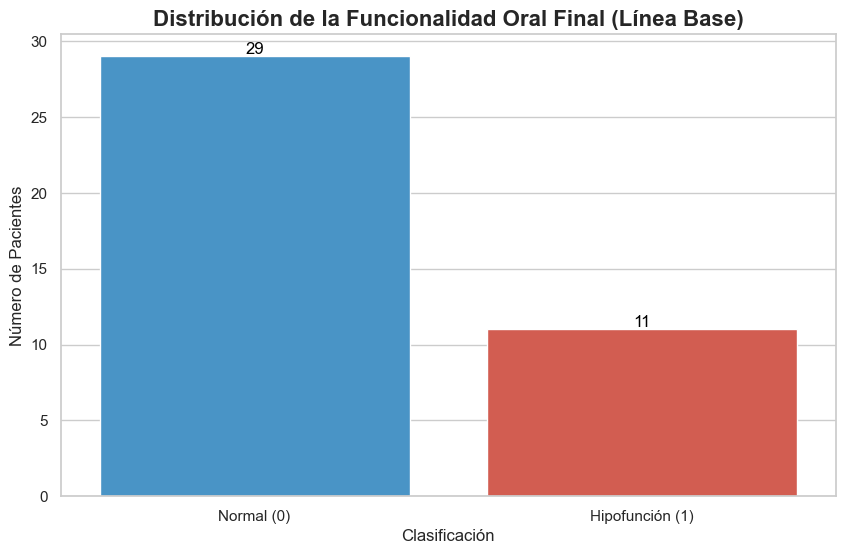

Gráfico guardado en: analisis_resultados\distribucion_funcionalidad_oral_final.png


C:\Users\gmola\AppData\Local\Temp\ipykernel_55576\1512263360.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\gmola\AppData\Local\Temp\ipykernel_55576\1512263360.py:102: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Grado A', 'Grado B', 'Grado C']) # Asumiendo que 1=A, 2=B, 3=C


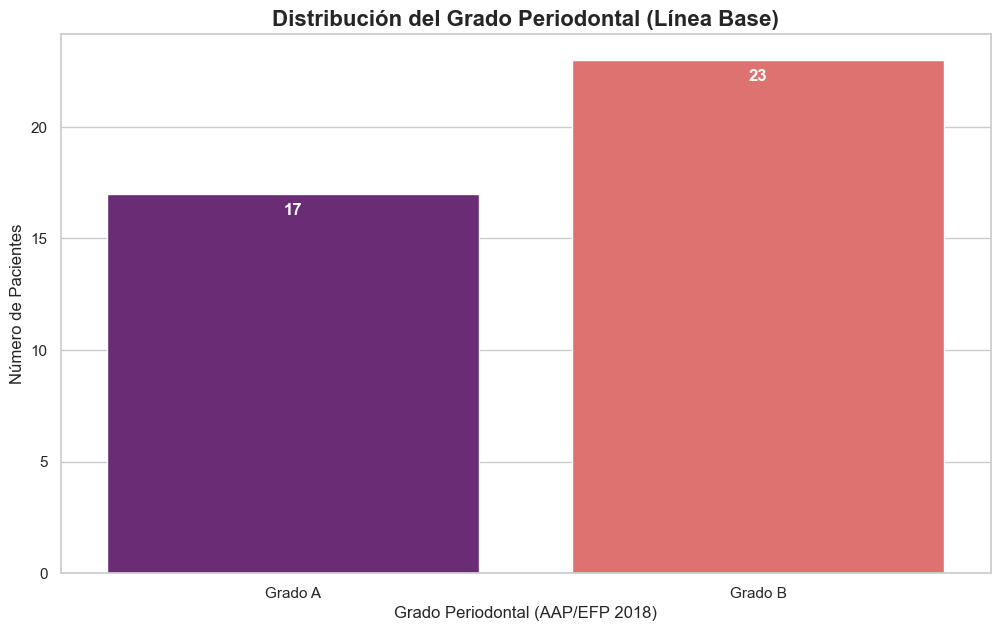

Gráfico guardado en: analisis_resultados\analisis_periodontal_v4_detallado.png


In [2]:
# ===============================================
# Celda 1: Importar librerías y configurar estilo
# ===============================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Estilo profesional para los gráficos
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams['font.size'] = 12

# Directorio de salida para las imágenes
OUTPUT_DIR = 'analisis_resultados'
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)

# ===============================================
# Celda 2: Cargar y preparar los datos
# (Asegúrate de tener el archivo Excel en la misma carpeta o ajusta la ruta)
# ===============================================
EXCEL_FILE_INICIAL = 'Base datos inicial.xlsx'

# Usaremos una versión simplificada de tu función de carga
def load_sheet_for_eda(excel_path, sheet_name, usecols, new_names):
    df = pd.read_excel(excel_path, sheet_name=sheet_name, header=1, usecols=usecols)
    df = df[~df[df.columns[0]].astype(str).str.contains('NO MODIFICAR', na=False)]
    df.columns = new_names
    df.dropna(subset=['correlativo'], inplace=True)
    df['correlativo'] = pd.to_numeric(df['correlativo'], errors='coerce').astype(int)
    return df

# Cargar los datos necesarios para los gráficos
try:
    # Para la funcionalidad oral final
    df_func_ini = load_sheet_for_eda(EXCEL_FILE_INICIAL, 'Funcionalidad oral', 'A:L', [
        'correlativo', 'leake_q1', 'leake_q2', 'leake_q3', 'leake_q4', 'leake_q5',
        'leake_resultado', 'eichner', 'funcion_masticatoria',
        'fuerza_oclusal', 'diadococinesia', 'funcion_deglutoria'
    ])
    
    # Recalcular la funcionalidad oral final
    df_func_ini['sum_func_components'] = df_func_ini[['funcion_masticatoria', 'fuerza_oclusal', 'diadococinesia', 'funcion_deglutoria']].sum(axis=1)
    df_func_ini['funcionalidad_oral_final'] = (df_func_ini['sum_func_components'] >= 3).astype(int)

    # Para el análisis periodontal
    df_diag_ini = load_sheet_for_eda(EXCEL_FILE_INICIAL, 'DIAGNOSTICO', 'A:E', [
        'correlativo', 'periodontal_caso', 'periodontal_estado',
        'periodontal_extension', 'periodontal_grado'
    ])
    
    print("Datos cargados exitosamente para el EDA.")
    
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo '{EXCEL_FILE_INICIAL}'. Asegúrate de que esté en la ruta correcta.")

# ===============================================
# Celda 3: Generar Gráfico 1 - Distribución de Funcionalidad Oral
# ===============================================
plt.figure(figsize=(10, 6))
ax = sns.countplot(
    x='funcionalidad_oral_final',
    data=df_func_ini,
    palette=["#3498db", "#e74c3c"]
)

# Añadir títulos y etiquetas
plt.title('Distribución de la Funcionalidad Oral Final (Línea Base)', fontsize=16, weight='bold')
plt.xlabel('Clasificación', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
ax.set_xticklabels(['Normal (0)', 'Hipofunción (1)'])

# Añadir etiquetas de conteo sobre las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Guardar la imagen
file_path_distribucion = os.path.join(OUTPUT_DIR, 'distribucion_funcionalidad_oral_final.png')
plt.savefig(file_path_distribucion, dpi=300, bbox_inches='tight')
plt.show()

print(f"Gráfico guardado en: {file_path_distribucion}")

# ===============================================
# Celda 4: Generar Gráfico 2 - Análisis Periodontal Detallado
# ===============================================
plt.figure(figsize=(12, 7))
ax = sns.countplot(
    x='periodontal_grado',
    data=df_diag_ini,
    order=sorted(df_diag_ini['periodontal_grado'].dropna().unique()),
    palette='magma'
)

# Añadir títulos y etiquetas
plt.title('Distribución del Grado Periodontal (Línea Base)', fontsize=16, weight='bold')
plt.xlabel('Grado Periodontal (AAP/EFP 2018)', fontsize=12)
plt.ylabel('Número de Pacientes', fontsize=12)
ax.set_xticklabels(['Grado A', 'Grado B', 'Grado C']) # Asumiendo que 1=A, 2=B, 3=C

# Añadir etiquetas de conteo
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='white', xytext=(0, -12),
                textcoords='offset points', weight='bold')

# Guardar la imagen
file_path_periodontal = os.path.join(OUTPUT_DIR, 'analisis_periodontal_v4_detallado.png')
plt.savefig(file_path_periodontal, dpi=300, bbox_inches='tight')
plt.show()

print(f"Gráfico guardado en: {file_path_periodontal}")